<a href="https://colab.research.google.com/github/MarkDeng86/ML_ClassProject/blob/main/Mark_Jonathan_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try 3 different models:
Ridge Regression

sklearn MLPRegressor (Neural Network, multi-layer perceptron)

Adjust hyperparameters and add regularization/feature transformation for each

Note: unsupervised analysis (describing features of data without model) is no longer required

Will need a table to hold different accuracies/f1 for each adjust of hyperparameters/regularization etc. Keep track of these values!



# Data Description
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
#sklearn Encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Using data set provided from Kaggle
train = pd.read_csv('/content/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#plot drawing function
import matplotlib.pyplot as plt

def plot_data(train, val, reg_list, hyperparam, subplot=None):
  if subplot:
    subplot.plot(reg_list, train, label='Training')
    subplot.plot(reg_list, val, label='Validation')
    subplot.legend()
  else:
    plt.plot(reg_list, train, label='Training')
    plt.plot(reg_list, val, label='Validation')
    plt.xlabel(hyperparam)
    plt.ylabel('Accuracy')
    plt.xlim([reg_list[0], reg_list[-1]])
    plt.legend()


#Preprocessing

In [ ]:
print("Train shape: ", train.shape)

Train shape:  (1460, 81)


In [ ]:
train_y = train['SalePrice']
train_X = train.drop(['Id','SalePrice'],axis = 1)

Differentiate Categorical and Quantitative Features

In [ ]:
cat_features_list = train_X.select_dtypes(include='object').columns.to_list()
quant_features_list = train_X.select_dtypes(exclude='object').columns.to_list()

In [ ]:
print(train_X[quant_features_list].columns[train_X[quant_features_list].isna().any()].to_list())
print(train_X[cat_features_list].columns[train_X[cat_features_list].isna().any()].to_list())

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Change missing values and replace with 0 or NONE

In [ ]:
# quant_nan_features = ['GarageYrBlt', 'GarageArea', 'GarageCars','LotFrontage','MasVnrArea']
# cat_nan_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 
#                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PoolQC',
#                    'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'Electrical', 'KitchenQual',
#                    'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st','MSZoning', 'Utilities']
quant_nan_features = train_X[quant_features_list].columns[train_X[quant_features_list].isna().any()].to_list()
cat_nan_features = train_X[cat_features_list].columns[train_X[cat_features_list].isna().any()].to_list()
for i in quant_nan_features:
    train_X[i].fillna(0, inplace=True)
    
for i in cat_nan_features:
    train_X[i].fillna('None', inplace=True)

Ordinal Encoding:
LotShape
Utilities
LandSlope
ExterQual
ExterCond
BsmntQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
KitchenQual
Functional
FireplaceQu
GarageFinish
GarageQual
GarageCond
PoolQC
Fence


In [ ]:
ordinal_encode_list = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
train_X[ordinal_encode_list] = encoder.fit_transform(train_X[ordinal_encode_list])
#print(train_X[ordinal_encode_list])

In [ ]:
train_X = pd.get_dummies(train_X)
print(train_X.shape)
#print(train_X)

(1460, 228)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


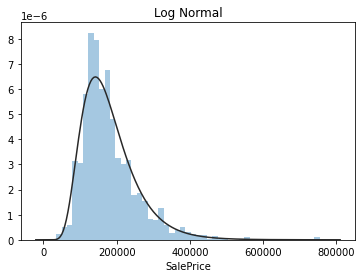

In [ ]:
# Distribution of Y
import scipy.stats as st
import seaborn as sns
y = train_y
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [ ]:
# Scale data
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(train_X)
Scaled_data=scaling.transform(train_X)


In [ ]:
X_trains, X_vals, y_trains, y_vals = train_test_split(Scaled_data, train_y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3, random_state=42)

In [ ]:
# Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Least Squares model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression train: ", lin_reg.score(X_train, y_train))
print("Linear Regression val: ", lin_reg.score(X_val, y_val))
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))


Linear Regression train:  0.9235651856525311
Linear Regression val:  0.8774122066365242
RMSE: 29247.71984338244


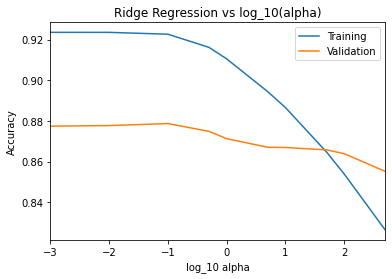

[0.9235650348933867, 0.9235509895007468, 0.9226413031325158, 0.916168889186799, 0.9105075585269816, 0.8943866673553366, 0.8865817711603159, 0.8647459461468519, 0.8539161745319293, 0.8263743753661072]
[0.877444824340659, 0.877715804243395, 0.878716077664331, 0.8748638160854814, 0.8712737564915856, 0.8670615683794777, 0.8669350734449263, 0.8657773643957994, 0.8639175771840807, 0.8551850261928691]


In [ ]:
# Linear Ridge Regression

alpha_list = [0.001,0.01,0.1,0.5, 1, 5, 10, 50 ,100,500]
ridge_train = []
ridge_val = []
log_alpha = np.log10(alpha_list)

for a in alpha_list:
    lin_ridge = linear_model.Ridge(alpha=a)
    lin_ridge.fit(X_train, y_train)
    ridge_train.append(lin_ridge.score(X_train, y_train))
    ridge_val.append(lin_ridge.score(X_val, y_val))

plot_data(ridge_train, ridge_val, log_alpha, 'log_10 alpha')
plt.title('Ridge Regression vs log_10(alpha)')
plt.show()

In [ ]:
ridge_train = [round(item,6) for item in ridge_train]
ridge_val = [round(item,6) for item in ridge_val]
print(ridge_train)
print(ridge_val)

[0.923565, 0.923551, 0.922641, 0.916169, 0.910508, 0.894387, 0.886582, 0.864746, 0.853916, 0.826374]
[0.877445, 0.877716, 0.878716, 0.874864, 0.871274, 0.867062, 0.866935, 0.865777, 0.863918, 0.855185]


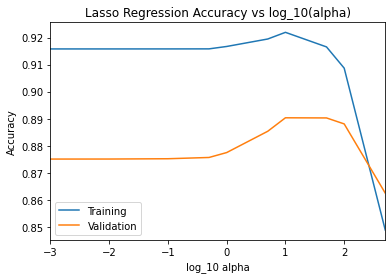

[0.915831, 0.915832, 0.915837, 0.915856, 0.916743, 0.919504, 0.921968, 0.91658, 0.908727, 0.848883]
[0.875113, 0.875124, 0.875235, 0.875701, 0.877519, 0.88539, 0.890373, 0.89032, 0.88811, 0.862521]


In [ ]:
# Linear Lasso Regression
lasso_train = []
lasso_val = []
alpha_list = [0.001,0.01,0.1,0.5, 1 ,5, 10, 50 ,100, 500]
log_alpha = np.log10(alpha_list)

for a in alpha_list:
    lin_lasso = linear_model.Lasso(alpha=a,tol = 0.0425)
    lin_lasso.fit(X_train, y_train)
    lasso_train.append(lin_lasso.score(X_train,y_train))
    lasso_val.append(lin_lasso.score(X_val,y_val))

plot_data(lasso_train, lasso_val, log_alpha, 'log_10 alpha')
plt.title('Lasso Regression Accuracy vs log_10(alpha)')
plt.show()
lasso_train = [round(item,6) for item in lasso_train]
lasso_val = [round(item,6) for item in lasso_val]
print(lasso_train)
print(lasso_val)

In [ ]:
# Polynomial Transformation - x^2
steps = [('scalar', StandardScaler()),('poly',PolynomialFeatures(degree=2)),('model', linear_model.LinearRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
print("Linear Regression train: ",pipeline.score(X_train, y_train))
print("Linear Regression val: ", pipeline.score(X_val, y_val))

Linear Regression train:  1.0
Linear Regression val:  0.7205945879279951


In [ ]:
# Polynomial Transformation with regulation - x^2
train = []
val = []
alpha_list = [1 ,5, 10, 100, 500, 1000, 10000,50000,100000]
log_alpha = np.log10(alpha_list)
for a in alpha_list:
    steps = [('scalar', StandardScaler()),('poly',PolynomialFeatures(degree=2)),('model', linear_model.Ridge(alpha=a))]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train,y_train)
    train.append(pipeline.score(X_train,y_train))
    val.append(pipeline.score(X_val,y_val))


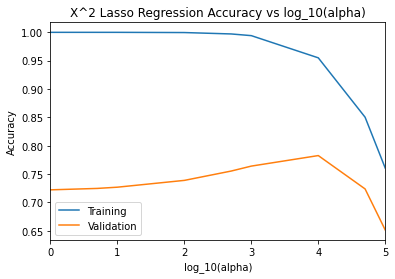

Linear Regression train:  [1.0, 0.999996, 0.999989, 0.999626, 0.997159, 0.99417, 0.955024, 0.850338, 0.760614]
Linear Regression val:  [0.72228, 0.72478, 0.726963, 0.738958, 0.755415, 0.764145, 0.782706, 0.723882, 0.651456]


In [ ]:
plt.title('X^2 Lasso Regression Accuracy vs log_10(alpha)')
plot_data(train, val, log_alpha, 'log_10(alpha)')
plt.show()
train = [round(item,6) for item in train]
val = [round(item,6) for item in val]
print("Linear Regression train: ",train)
print("Linear Regression val: ", val)

In [ ]:
#Neural Network Model with L2 Regularization
from sklearn.neural_network import MLPRegressor
NN_train = []
NN_val = []
alpha_list = [1,10,100,10000,1000000,10000000,100000000,1000000000]
log_alpha = np.log10(alpha_list)
for a in alpha_list:
  NN = MLPRegressor((200), activation='relu',alpha=a, learning_rate_init = 0.001,max_iter=5000,random_state=1,
                  momentum=.9)
  NN.fit(X_trains, y_train)
  NN_train.append(NN.score(X_trains, y_train))
  NN_val.append(NN.score(X_vals, y_val))


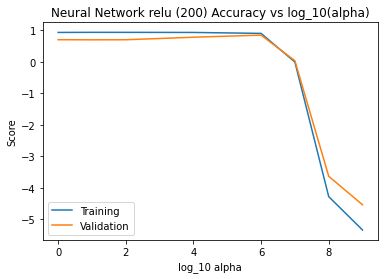

NN train:  [0.930685, 0.933757, 0.933134, 0.930365, 0.900219, -0.008665, -4.281182, -5.340695]
NN val:  [0.69965, 0.696505, 0.698348, 0.778703, 0.845374, 0.031893, -3.634808, -4.539521]


In [ ]:
plt.title('Neural Network relu (200) Accuracy vs log_10(alpha)')
plt.plot(log_alpha, NN_train, label ='Training')
plt.plot(log_alpha, NN_val, label ='Validation')
plt.xlabel("log_10 alpha")
plt.ylabel("Score")
plt.legend()
plt.show()
NN_train = [round(item,6) for item in NN_train]
NN_val = [round(item,6) for item in NN_val]
print("NN train: ",NN_train)
print("NN val: ", NN_val)

In [ ]:
#Binary Classification with price threshold using SVM
from sklearn.svm import SVC
threshold = 200000 # cost of the house
y_bin = []
for i in train_y:  
   if i >= threshold:
     y_bin.append(1)
   else:
     y_bin.append(0)
y_bin = np.array(y_bin)

X_trainc, X_valc, y_trainc, y_valc = train_test_split(Scaled_data, y_bin, test_size=0.3)


SVM training accuracies
Kernel function used: linear 
Accuracys:  [0.982387, 0.984344, 0.985323, 0.984344, 0.985323, 0.988258, 0.98728, 0.988258, 0.988258, 0.989237, 0.989237, 0.991194, 0.991194, 0.992172]
Kernel function used: poly 
Accuracys:  [0.726027, 0.755382, 0.790607, 0.815068, 0.833659, 0.855186, 0.863014, 0.882583, 0.895303, 0.899217, 0.906067, 0.921722, 0.938356, 0.947162]
Kernel function used: rbf 
Accuracys:  [0.879648, 0.895303, 0.918787, 0.944227, 0.966732, 0.975538, 0.982387, 0.983366, 0.984344, 0.984344, 0.985323, 0.988258, 0.989237, 0.989237]
Kernel function used: sigmoid 
Accuracys:  [0.903131, 0.919765, 0.922701, 0.928571, 0.931507, 0.932485, 0.934442, 0.932485, 0.931507, 0.92955, 0.933464, 0.936399, 0.934442, 0.931507]

SVM validation accuracies
Kernel function used: linear 
Accuracys:  [0.917808, 0.917808, 0.915525, 0.922374, 0.924658, 0.924658, 0.924658, 0.917808, 0.915525, 0.913242, 0.915525, 0.906393, 0.908676, 0.90411]
Kernel function used: poly 
Accuracys:  [

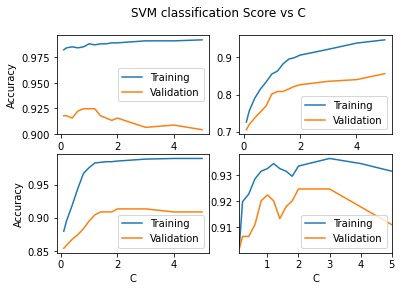

In [ ]:
c_list = [.1,.2,.4,.6,.8,1,1.2,1.4,1.6,1.8,2,3,4,5]
fig, axs = plt.subplots(2,2)
fig.suptitle('SVM classification Score vs C')
plotnum = 0
svm_train=[]
svm_val=[]
kernels = ['linear','poly','rbf','sigmoid']

for k in kernels:
  svm_train.append([])
  svm_val.append([])
  for c in c_list:
      svm= SVC(C=c,kernel=k)
      svm.fit(X_trainc,y_trainc)
      svm_train[-1].append(svm.score(X_trainc, y_trainc))
      svm_val[-1].append(svm.score(X_valc,y_valc))

  plot_data(svm_train[plotnum], svm_val[plotnum], c_list, 'C', axs[plotnum//2, plotnum%2])
  plotnum += 1
plt.xlim([c_list[0], c_list[-1]])
plt.setp(axs[-1, :], xlabel='C')
plt.setp(axs[:, 0], ylabel='Accuracy')



print('SVM training accuracies')
for i in range(len(svm_train)):
  svm_train[i] = [round(item,6) for item in svm_train[i]]
  print('Kernel function used:', kernels[i], '\nAccuracys: ', svm_train[i])

print('\nSVM validation accuracies')
for i in range(len(svm_val)):
  svm_val[i] = [round(item,6) for item in svm_val[i]]
  print('Kernel function used:', kernels[i], '\nAccuracys: ', svm_val[i])